# Machine learning:
After we built and visualized our final dataframe, it's time to let the machine learn.  
In the following notebook we'll try to check if we can predict the success of a video game.  


In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (8, 4)

In [2]:
def load_df(df_name):
    return pd.read_csv(df_name)

In [5]:
# Loading the dataset into 2 datasets.
# X --> The data set without some columns as shown in the list below
# y --> The target column (the 'is_successful' column)

def load_dataset(file_name, target_column):
    X = pd.read_csv(file_name, usecols=lambda col:col not in ["name", "developer", "publisher", "score", target_column])
    y = pd.read_csv(file_name)[target_column]
    return X,y

In [7]:
def train_model(X_train, y_train): 
    clf = LogisticRegression(max_iter=150)
    trained_model = clf.fit(X_train, y_train)
    return trained_model

In [5]:
df = load_df("final_df.csv")

# rounding each score value to the nearest integer
for i in range(len(df)):
    score = df.score.loc[i]
    df.at[i, 'score'] = round(score)

In [189]:
df['is_successful'].value_counts()

1    2545
0    2243
Name: is_successful, dtype: int64

In [190]:
#creating dataframe sample that has equal amount of rows with 0, 1 values of 'is_successful' (gives better prediction)
ones_sample = df[df['is_successful'] == 1].sample(n=2243)
zeros_sample = df[df['is_successful'] == 0]
AB_testing_df = pd.concat([ones_sample, zeros_sample])
AB_testing_df['is_successful'].value_counts()
AB_testing_df.to_csv("sample.csv", index=False)

In [192]:
AB_testing_df.reset_index(drop=True, inplace=True)
AB_testing_df 
#NOTE: From now on the the dataframe variable is called 'df_s' 

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score,is_successful
0,Return of the Obra Dinn,Lucas Pope,3909,14653,483,350000.0,474,587,14.99,673372,5975,318,89.0,1
1,Tropico 4,Haemimont Games,Kalypso Media Digital,10492,943,3500000.0,957,225,5.99,191615,430,254,78.0,1
2,TREE,The Strangers,The Strangers,1820,105,350000.0,0,0,0.00,63685,222,0,94.0,1
3,N++ (NPLUSPLUS),Metanet Software Inc.,Metanet Software Inc.,2350,133,350000.0,276,206,7.49,259423,2953,0,94.0,1
4,Super Mega Baseball 2,Metalhead Software Inc.,Electronic Arts,892,113,150000.0,1718,3215,19.99,8045,56,10,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,Sands of Fire,Three-Sixty Pacific,Ziggurat,1,0,350000.0,0,0,3.49,22116,115,48,1.0,0
4482,Battle Command,Ocean Software,Pixel Games UK,1,0,350000.0,0,0,4.99,5,0,0,1.0,0
4483,Dragon Hunters,Sigonheart Games LLC,Sigonheart Games LLC,1,0,150000.0,0,0,19.99,45829,344,23,1.0,0
4484,Squares,Jason Swisher,Jason Swisher,1,0,150000.0,0,0,0.99,632903,2807,186,1.0,0


In [32]:
df_s = pd.read_csv("sample.csv")
X, y = load_dataset("sample.csv", 'is_successful')
trained_model = train_model(X, y)

In [9]:
predicted_vals = trained_model.predict(X)
predicted_vals

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [33]:
#counting how many predictions are correct

count = 0 
for i in range(len(y)):
    if predicted_vals[i] == y[i]:
        count+=1
count

3837

In [34]:
X

,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments
0,14653,483,350000.0,474,587,14.99,673372,5975,318
1,10492,943,3500000.0,957,225,5.99,191615,430,254
2,1820,105,350000.0,0,0,0.00,63685,222,0
3,2350,133,350000.0,276,206,7.49,259423,2953,0
4,892,113,150000.0,1718,3215,19.99,8045,56,10
...,...,...,...,...,...,...,...,...,...
4481,1,0,350000.0,0,0,3.49,22116,115,48
4482,1,0,350000.0,0,0,4.99,5,0,0
4483,1,0,150000.0,0,0,19.99,45829,344,23
4484,1,0,150000.0,0,0,0.99,632903,2807,186


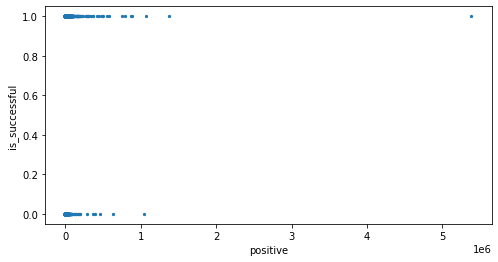

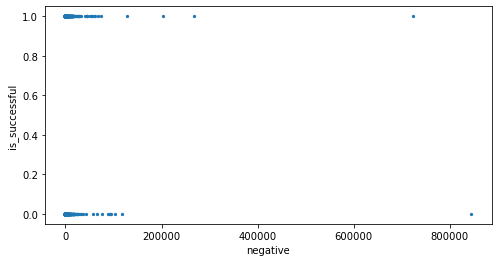

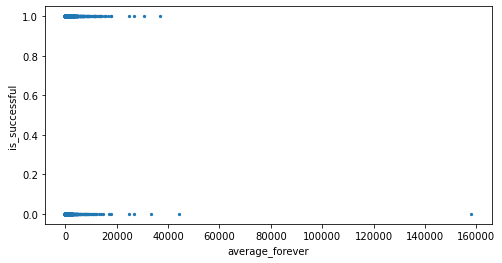

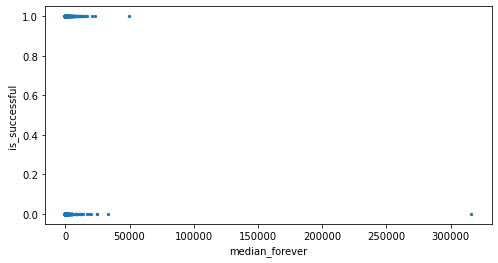

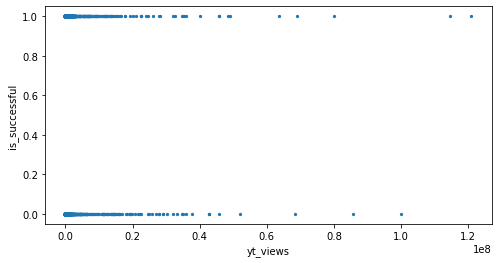

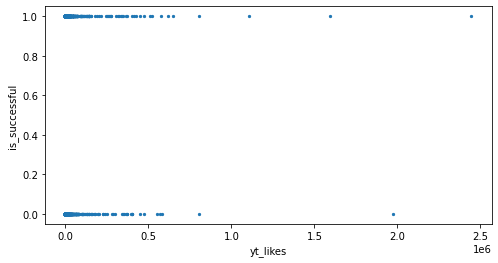

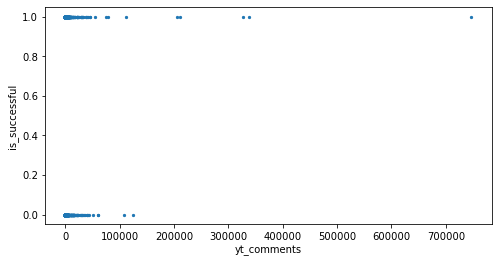

In [35]:
#Scatter plotting to see the correlation between various columns and the 'is_successful' column
for name in X.columns:
    if name not in ['owners_approx', 'price']:
        df_s.plot.scatter(x=name,y='is_successful', s=5)

As shown in the scatter plots above, we wanted to see the relation between each column with the 'is_successful' column. 

Now let's create scatter plots again, but this time we'll _predict_proba_ to see the probabilty of predicting '1'

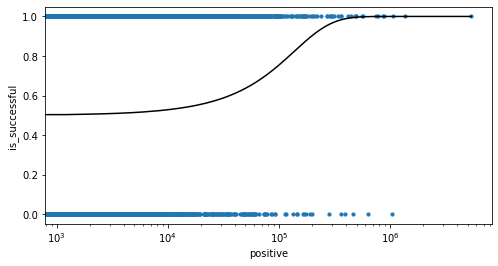

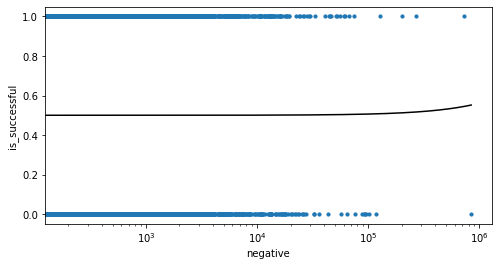

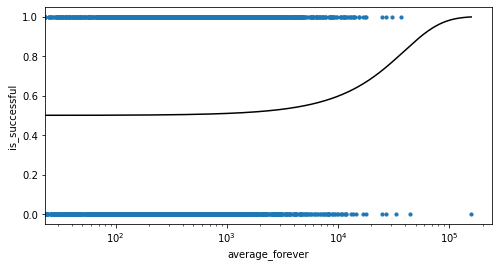

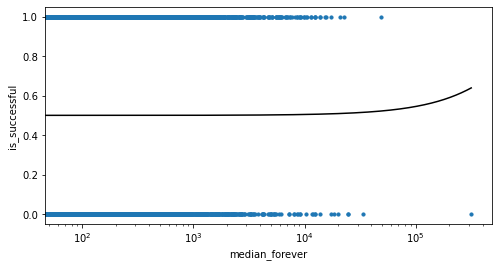

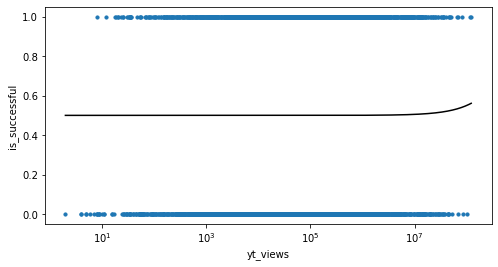

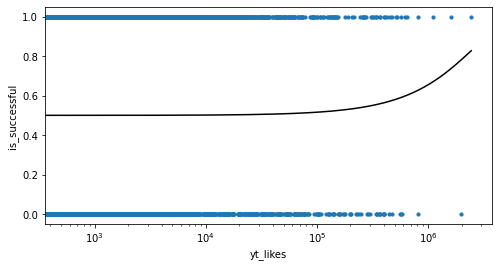

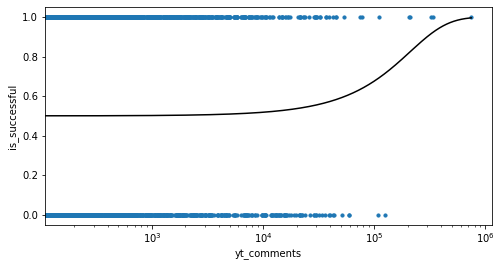

In [36]:
for name in X.columns:
    if name not in ['owners_approx', 'price', 'score']:
        lr = train_model(df_s[[name]], df_s['is_successful'])
        df_s.plot.scatter(x=name,y='is_successful',s=10)
        x = np.linspace(df_s[name].min(),df_s[name].max(),len(df_s))
        
        #get probabilistic predictions for those points (using predict_proba)
        y_pred_p=lr.predict_proba(np.reshape(x, (-1, 1))) # we need to reshape x to get it to a 2 dimensional array
        
        #get only the probability for the "pass" category
        y_pred_p1=[y1[1] for y1 in y_pred_p]
        
        plt.xscale('log')
        #plot the prediction graph
        plt.plot(x,y_pred_p1,color='Black')
        
        plt.show()

We can see that games with high amount of positive feedback has direct impact on the game score and higher score indicates that the game is a success! 😀  
Also, the average play time for successful games are very high.  
High views and likes amount on YouTube also have some positive indication of a game success.  

In [14]:
#setting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
def scale_features(X_train, scale_type):
    scaler = None
    X_train_scaler = None
    if scale_type == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
    elif scale_type == 'minmax':
        scaler = MinMaxScaler(feature_range=(0,1))
        X_train_scaled = scaler.fit_transform(X_train)
        
    return scaler, X_train_scaled

In [16]:
def scale_test_features(X_test, scaler):
    return pd.DataFrame(scaler.transform(X_test))

In [17]:
def train_classifier(X_train, y_train):
    return LogisticRegression().fit(X_train, y_train)

In [18]:
def predict(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    resultDF = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
    return resultDF

In [19]:
def evaluate_performance(y_test,y_predicted):
    evaluate_value = metrics.f1_score(y_test, y_predicted)
    return evaluate_value

In [20]:
# counting how many successful prediction there are for each dataset from the scaled df's and the non-scaled df
def count_pred_success(df_scaled):
    ttl = 0
    for a, p in zip(df_scaled['Actual'], df_scaled['Predicted']):
        if a == p:
            ttl +=1
    return ttl

In [21]:
minmax_scaler, X_train_minmax_scaled = scale_features(X_train, 'minmax')
X_test_minmax_scaled = scale_test_features(X_test, minmax_scaler)
standard_scaler, X_train_standard_scaled = scale_features(X_train, 'standard')
X_test_standard_scaled = scale_test_features(X_test, standard_scaler)
classification_model = train_classifier(X_train, y_train)
classification_minmax_model = train_classifier(X_train_minmax_scaled, y_train)
classification_standard_model = train_classifier(X_train_standard_scaled, y_train)

In [37]:
print(X_train_minmax_scaled)
print("-------------------------------------------------------")
print(X_test_minmax_scaled)
print("-------------------------------------------------------")
print(X_train_standard_scaled)
print("-------------------------------------------------------")
print(X_test_standard_scaled)
print("-------------------------------------------------------")
print(classification_model)
print("-------------------------------------------------------")
print(classification_minmax_model)
print("-------------------------------------------------------")
print(classification_standard_model)
print("-------------------------------------------------------")

[[3.79008010e-05 2.93743500e-04 2.67201069e-03 ... 8.03076791e-02
  2.78116045e-02 1.37679916e-02]
 [1.69067298e-04 9.47559678e-05 2.67201069e-03 ... 9.30368922e-05
  2.21687069e-04 5.21050438e-04]
 [8.69488963e-05 1.82405238e-04 2.67201069e-03 ... 4.87231698e-04
  3.68972313e-04 1.04210088e-04]
 ...
 [3.14911067e-04 7.36727650e-04 0.00000000e+00 ... 1.94444572e-03
  4.61088858e-04 6.06870510e-04]
 [8.63915316e-05 1.68191843e-04 0.00000000e+00 ... 1.59257217e-04
  2.02453944e-05 5.82350489e-05]
 [1.92662405e-04 2.17938726e-04 2.67201069e-03 ... 4.30961455e-03
  1.24711630e-03 5.94610499e-04]]
-------------------------------------------------------
             0         1         2         3         4         5         6  \
0     0.010625  0.007776  0.098196  0.013869  0.001889  0.000000  0.005191   
1     0.000056  0.000131  0.002672  0.024957  0.025328  0.000000  0.000010   
2     0.030994  0.015241  0.098196  0.071674  0.016492  0.333222  0.002702   
3     0.005290  0.001681  0.0080

In [38]:
df_res = predict(classification_model, X_test, y_test)
df_minmax_res = predict(classification_minmax_model, X_test_minmax_scaled, y_test)
df_standard_res = predict(classification_standard_model, X_test_standard_scaled, y_test)

In [39]:
#Creating series for each 'y' - not scaled, minmax and standard scaler
y_pred = pd.Series(df_res['Predicted'])
y_pred_minmax = pd.Series(df_minmax_res['Predicted'])
y_pred_standard = pd.Series(df_standard_res['Predicted'])

#Evaluating the predictions
eval_res = evaluate_performance(y_test, y_pred)
eval_res_minmax = evaluate_performance(y_test, y_pred_minmax)
eval_res_standard = evaluate_performance(y_test, y_pred_standard)

#Counting how many prediction are successful
res = count_pred_success(df_res)
minmax = count_pred_success(df_minmax_res)
standard = count_pred_success(df_standard_res)

print("Correct Prediction count without scaling     --> " + str(res))
print("Correct Prediction count for MinMax scaler   --> " + str(minmax))
print("Correct Prediction count for Standard scaler --> " + str(standard))
print("* Out of " + str(len(y_test)) + " predictions")
print("---------------------------------------------------------------")
print("Prediction accuracy without scaling       --> " + str(round(eval_res*100)) + "%")
print("Prediction accuracy with MinMax scaling   --> " + str(round(eval_res_minmax*100)) + "%")
print("Prediction accuracy with Standard scaling --> " + str(round(eval_res_standard*100)) + "%")

Correct Prediction count without scaling     --> 1100
Correct Prediction count for MinMax scaler   --> 805
Correct Prediction count for Standard scaler --> 909
* Out of 1346 predictions
---------------------------------------------------------------
Prediction accuracy without scaling       --> 83%
Prediction accuracy with MinMax scaling   --> 53%
Prediction accuracy with Standard scaling --> 62%


In [40]:
def create_cm(df):
    return confusion_matrix(df['Actual'], df['Predicted'])

In [41]:
cm_no_scale = create_cm(df_res)
cm_minmax = create_cm(df_minmax_res)
cm_standard = create_cm(df_standard_res)

print("Confusion matrix of unscaled result:")
print(cm_no_scale)
print("-------------------------------")
print("Confusion matrix of MinMax scaled result:")
print(cm_minmax)
print("-------------------------------")
print("Confusion matrix of Standard scaled result:")
print(cm_standard)

Confusion matrix of unscaled result:
[[499 158]
 [ 88 601]]
-------------------------------
Confusion matrix of MinMax scaled result:
[[504 153]
 [388 301]]
-------------------------------
Confusion matrix of Standard scaled result:
[[547 110]
 [327 362]]


As it seems, the predictions after scaling the dataset are almost 100% accurate.
(Could be overfitting?)

In [42]:
def eval_methods(df):
    accuracy = metrics.accuracy_score(df['Actual'], df['Predicted'])
    precision = metrics.precision_score(df['Actual'], df['Predicted'])
    recall = metrics.recall_score(df['Actual'], df['Predicted'])
    f_measure = metrics.f1_score(df['Actual'], df['Predicted'])
    return [accuracy, precision, recall, f_measure]

In [43]:
df_unscaled_evals = eval_methods(df_res)
df_minmax_eval = eval_methods(df_minmax_res)
df_standard_evals = eval_methods(df_standard_res)

In [44]:
print("Unscaled dataframe:")
print("Accuracy is:  ", df_unscaled_evals[0])
print("Precision is: ", df_unscaled_evals[1])
print("Recall is:    ", df_unscaled_evals[2])
print("F1 is:        ", df_unscaled_evals[3])
print("----------------------------------")

print("MinMax scaled:")
print("Accuracy is:  ", df_minmax_eval[0])
print("Precision is: ", df_minmax_eval[1])
print("Recall is:    ", df_minmax_eval[2])
print("F1 is:        ", df_minmax_eval[3])
print("----------------------------------")

print("Standeard scaled:")
print("Accuracy is:  ", df_standard_evals[0])
print("Precision is: ", df_standard_evals[1])
print("Recall is:    ", df_standard_evals[2])
print("F1 is:        ", df_standard_evals[3])
print("----------------------------------")

Unscaled dataframe:
Accuracy is:   0.8172362555720654
Precision is:  0.7918313570487484
Recall is:     0.872278664731495
F1 is:         0.8301104972375691
----------------------------------
MinMax scaled:
Accuracy is:   0.5980683506686478
Precision is:  0.6629955947136564
Recall is:     0.43686502177068215
F1 is:         0.5266841644794401
----------------------------------
Standeard scaled:
Accuracy is:   0.6753343239227341
Precision is:  0.7669491525423728
Recall is:     0.525399129172714
F1 is:         0.623600344530577
----------------------------------


# KNN:
Finding the precision of the prediction using KNN Algorithm: 

In [29]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_true = y_test, y_pred = knn_y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = knn_y_pred))

[[424 233]
 [283 406]]
Accuracy =  0.6166419019316494


Precision is much lower than the previous predictions.  
  
Now let's try to find the accuracy for a range of K values and see what happens:

In [31]:
k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,25):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred_train=clf.predict(X_train)
    knn_y_pred=clf.predict(X_test)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = y_test, y_pred = knn_y_pred))

df_knn = pd.DataFrame({"k":k_s, "train_accuracy":train_accuracies, "test_accuracy":test_accuracies})
df_knn

,k,train_accuracy,test_accuracy
0,1,1.000000,0.615156
1,2,0.812420,0.595097
2,3,0.809236,0.616642
3,4,0.756688,0.597325
4,5,0.761783,0.621842
5,6,0.732484,0.601783
6,7,0.730255,0.623328
7,8,0.717834,0.612184
8,9,0.716561,0.618871
9,10,0.700000,0.604755


We can see that for higher k values we  get lower accuracy for the train set.

Now lets check some big and well-known and some unknown publishers and see how many of their games are successful and how many failed. 

In [28]:
#crosstab to see how many successful and failed games each known publisher has
ct = pd.crosstab(df_s['publisher'], df_s['is_successful'])
ct.loc[ct.index.isin(['Ubisoft', '2K', 'Electronic Arts', 'Valve', 'Activision', 'Rockstar Games', 'Capcom', 'SEGA'])]

is_successful,0,1
publisher,,
2K,17,29
Activision,3,21
Capcom,9,13
Electronic Arts,23,38
Rockstar Games,2,13
SEGA,26,45
Ubisoft,32,48
Valve,2,26


In [62]:
#cross tab with unfamilier and small publishers
devs = [name for name in ct.index if ct.at[name, 0]!= 0 and ct.at[name, 0]>ct.at[name,1]+10]
ct.loc[ct.index.isin(devs)]

is_successful,0,1
publisher,,
Back To Basics Gaming,34,2
CI Games,11,0
Focus Home Interactive,21,8
Funbox Media Ltd,13,2
KISS ltd,17,0
New Reality Games,22,2
SA Industry,12,1
Senpai Studios,15,3
Sometimes You,24,0


We can see that even big and known publishers can fail so many times. However, they tend to succeed.
On the other hand, less known publishers tend to fail.